                  交易日     涨跌  逐笔累计盈亏
交易日                                 
2020-02-21 2020-02-21    0.0     0.0
2020-02-28 2020-02-28  -19.2   -19.2
2020-03-06 2020-03-06   -0.6   -19.8
2020-03-13 2020-03-13   20.8     1.0
2020-03-17 2020-03-17   11.6    12.6
...               ...    ...     ...
2022-02-25 2022-02-25   19.0   942.1
2022-03-04 2022-03-04  -42.6   899.5
2022-03-11 2022-03-11  130.8  1030.3
2022-03-18 2022-03-18   24.0  1054.3
2022-03-25 2022-03-25  -53.2  1001.1

[105 rows x 3 columns]
                  交易日     涨跌  逐笔累计盈亏   实际涨跌  实际累计盈亏
交易日                                                
2020-02-21 2020-02-21    0.0     0.0    0.0     0.0
2020-02-28 2020-02-28  -14.6   -14.6  -14.6   -14.6
2020-03-06 2020-03-06   11.2    -3.4   11.2    -3.4
2020-03-13 2020-03-13  184.8   181.4  184.8   181.4
2020-03-17 2020-03-17    0.0   181.4    0.0   181.4
...               ...    ...     ...    ...     ...
2022-02-25 2022-02-25  -34.0  1164.9  -34.0  1181.8
2022-03-04 2022-03-04  -18.

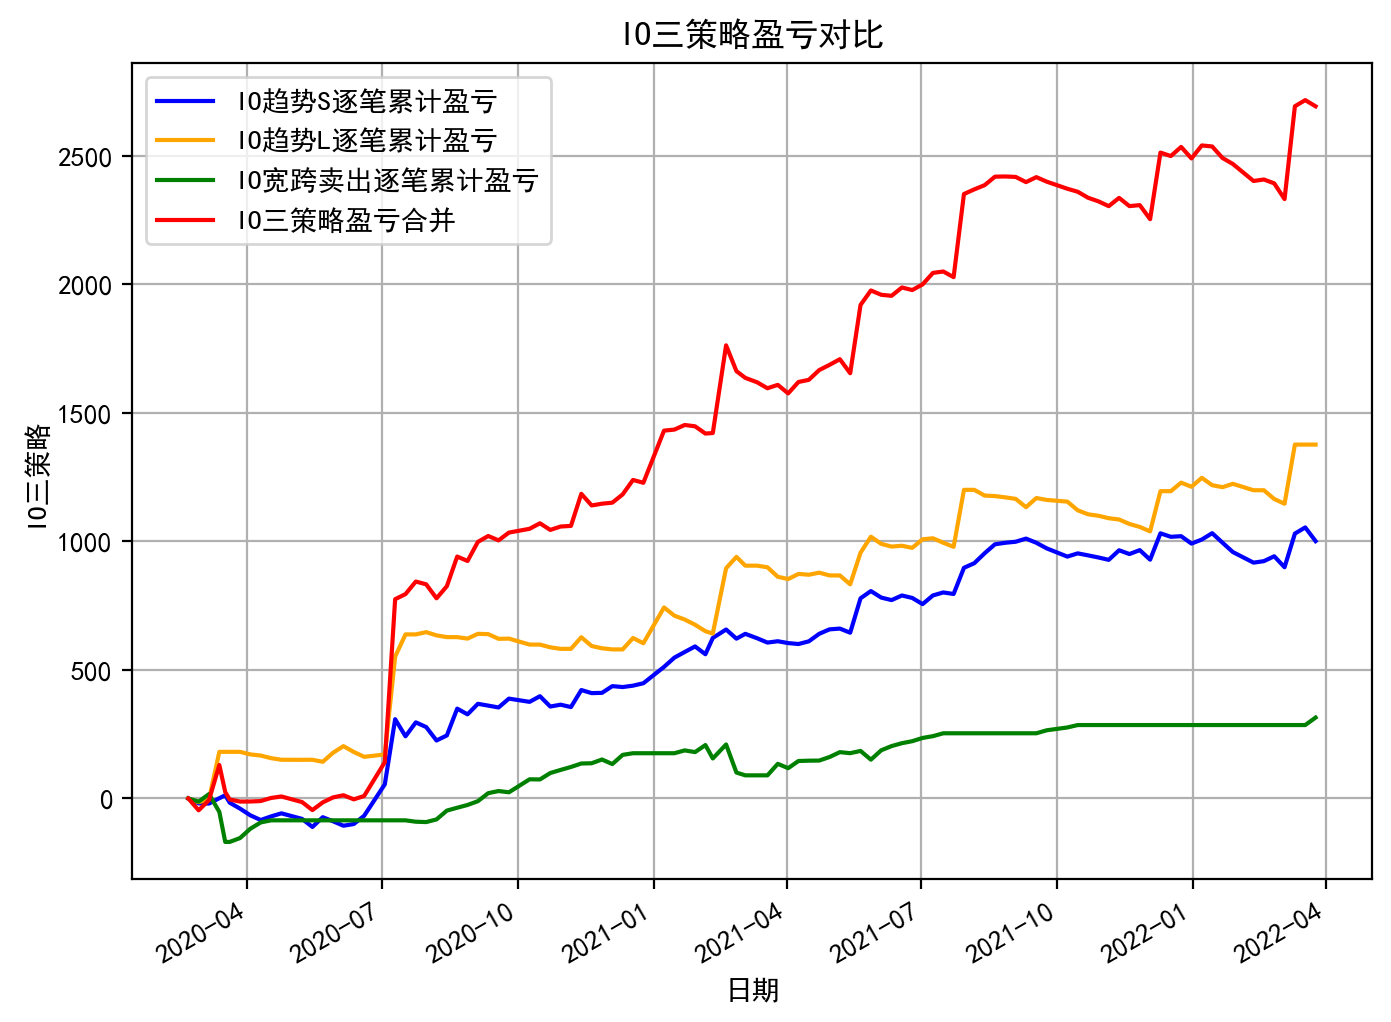

                  交易日     涨跌  逐笔累计盈亏
交易日                                 
2020-02-21 2020-02-21    0.0     0.0
2020-02-28 2020-02-28  -19.2   -19.2
2020-03-06 2020-03-06   -0.6   -19.8
2020-03-13 2020-03-13   20.8     1.0
2020-03-17 2020-03-17   11.6    12.6
...               ...    ...     ...
2022-02-25 2022-02-25   19.0   942.1
2022-03-04 2022-03-04  -42.6   899.5
2022-03-11 2022-03-11  130.8  1030.3
2022-03-18 2022-03-18   24.0  1054.3
2022-03-25 2022-03-25  -53.2  1001.1

[105 rows x 3 columns]
                  交易日     涨跌  逐笔累计盈亏   实际涨跌  实际累计盈亏
交易日                                                
2020-02-21 2020-02-21    0.0     0.0    0.0     0.0
2020-02-28 2020-02-28  -14.6   -14.6  -14.6   -14.6
2020-03-06 2020-03-06   11.2    -3.4   11.2    -3.4
2020-03-13 2020-03-13  184.8   181.4  184.8   181.4
2020-03-17 2020-03-17    0.0   181.4    0.0   181.4
...               ...    ...     ...    ...     ...
2022-02-25 2022-02-25  -34.0  1164.9  -34.0  1181.8
2022-03-04 2022-03-04  -18.

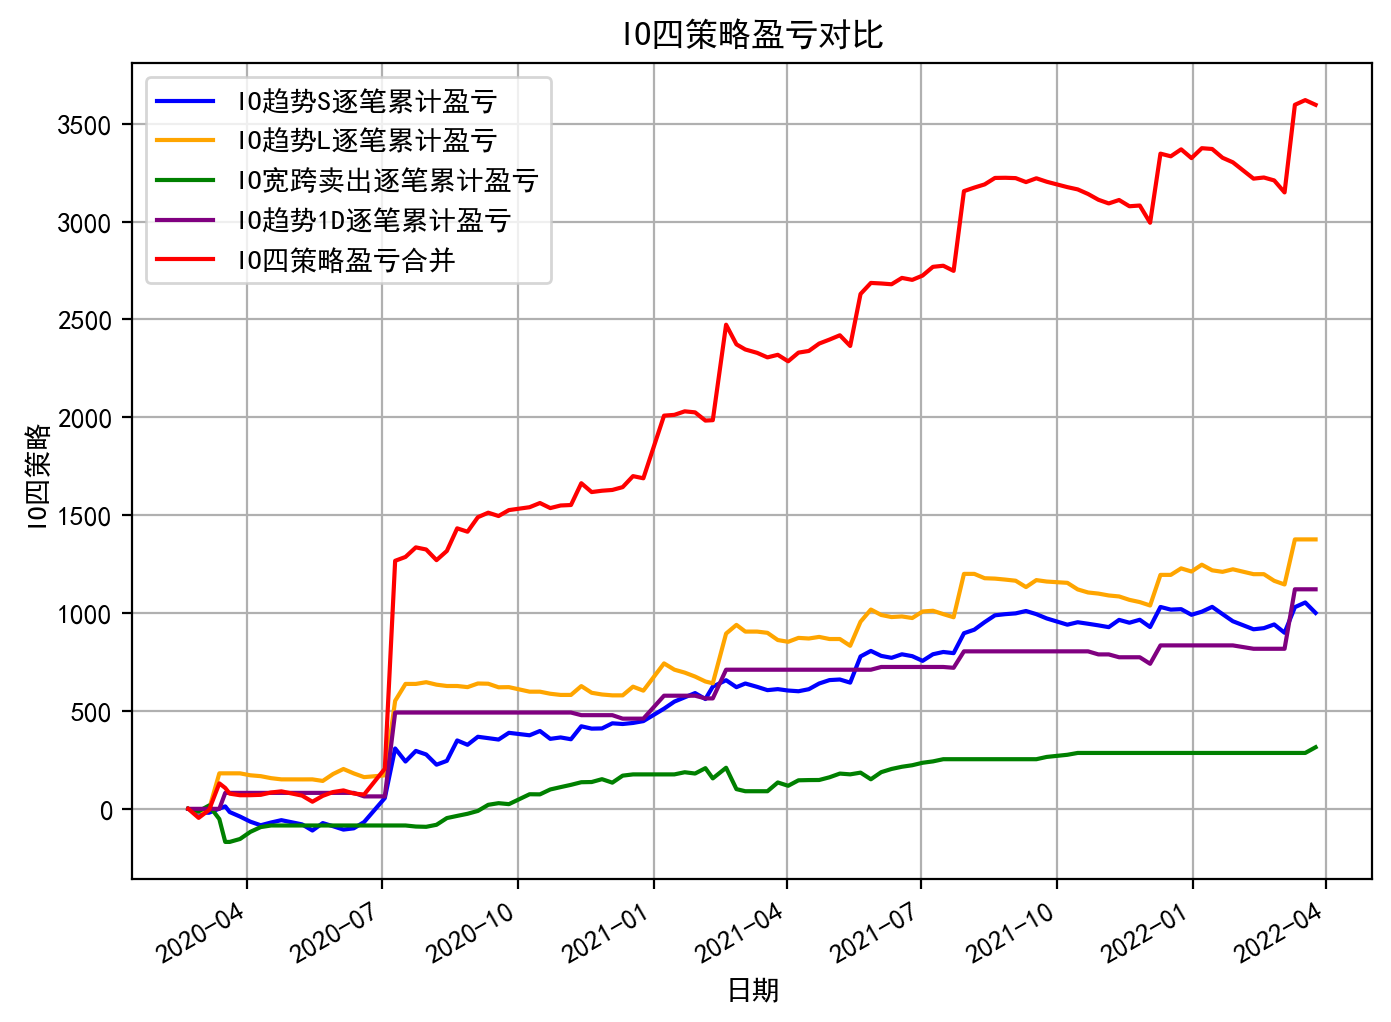

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


def show_pnl():
    df = pd.read_excel('IO宽跨卖出每周核算数据.xlsx')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    # # 画单轴
    # ax1 = plt.subplot(1, 1, 1)
    # plt.sca(ax1)
    # plt.title('IO策略盈亏')
    # plt.plot(df['逐笔累计盈亏'])
    # plt.grid()
    # plt.show()

    # 画双轴
    df2 = pd.read_csv('index_day_closeprice_data.csv')
    df2.index = pd.to_datetime(df2['date'], format='%Y-%m-%d')
    intersection_index = df.index.intersection(df2.index)
    df = df[df.index.isin(intersection_index)]
    df2 = df2[df2.index.isin(intersection_index)]

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='策略逐笔累计盈亏')
    plt.xlabel('日期')
    ax1.set_ylabel('IO策略')
    plt.legend(loc=2)

    ax2 = ax1.twinx()
    df2['000300.SH'].plot(ax=ax2, color='yellow', label='沪深300指数')
    ax2.set_ylabel('沪深300指数')
    plt.legend(loc=1)
    plt.title('IO策略盈亏与沪深300走势对比')
    plt.show()


def show_pnl_2():
    df_1 = pd.read_excel('IO趋势60M每周核算数据.xls')
    df_1.index = pd.to_datetime(df_1['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df_1)

    df = pd.read_excel('IO宽跨卖出每周核算数据.xlsx')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    df2 = pd.read_excel('IO趋势60M与宽跨卖出合并每周核算数据.xls')
    df2.index = pd.to_datetime(df2['交易日'], format='%Y-%m-%d')
    intersection_index = df.index.intersection(df2.index)
    df = df[df.index.isin(intersection_index)]
    df2 = df2[df2.index.isin(intersection_index)]

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='orange', label='IO宽跨策略逐笔累计盈亏')
    df_1['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='IO趋势策略逐笔累计盈亏')
    plt.xlabel('日期')
    ax1.set_ylabel('IO双策略')
    plt.legend(loc=2)

    ax2 = ax1.twinx()
    df2['逐笔累计盈亏'].plot(ax=ax2, color='red', label='IO趋势策略与宽跨策略盈亏合并')
    ax2.set_ylabel('盈亏合并')
    plt.legend(loc='lower right')

    plt.title('IO双策略盈亏对比')
    plt.show()


def show_pnl_3():
    df_1 = pd.read_excel('IO趋势60M每周核算数据.xls')
    df_1.index = pd.to_datetime(df_1['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df_1)

    df = pd.read_excel('IO宽跨卖出每周核算数据.xlsx')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    df2 = pd.read_excel('IO趋势60M与宽跨卖出合并每周核算数据.xls')
    df2.index = pd.to_datetime(df2['交易日'], format='%Y-%m-%d')
    # intersection_index = df.index.intersection(df2.index)
    # df = df[df.index.isin(intersection_index)]
    # df2 = df2[df2.index.isin(intersection_index)]

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='orange', label='IO宽跨策略逐笔累计盈亏')
    df_1['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='IO趋势策略逐笔累计盈亏')
    df2['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='red', label='IO趋势策略与宽跨策略盈亏合并')
    plt.xlabel('日期')
    ax1.set_ylabel('IO双策略')
    plt.legend(loc=2)

    # ax2 = ax1.twinx()
    # df2['逐笔累计盈亏'].plot(ax=ax2, color='red', label='IO趋势策略与宽跨策略盈亏合并')
    # ax2.set_ylabel('盈亏合并')
    # plt.legend(loc='lower right')

    plt.title('IO双策略盈亏对比')
    plt.show()


def show_pnl_4():
    df_1 = pd.read_excel('IO趋势15M每周核算数据.xls')
    df_1.index = pd.to_datetime(df_1['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df_1)

    df = pd.read_excel('IO趋势60M每周核算数据.xls')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    df2 = pd.read_excel('IO趋势15M与IO趋势60M合并每周核算数据.xls')
    df2.index = pd.to_datetime(df2['交易日'], format='%Y-%m-%d')
    # intersection_index = df.index.intersection(df2.index)
    # df = df[df.index.isin(intersection_index)]
    # df2 = df2[df2.index.isin(intersection_index)]

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='IO趋势60M逐笔累计盈亏')
    df_1['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='orange', label='IO趋势15M逐笔累计盈亏')
    df2['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='red', label='IO趋势15M与IO趋势60M盈亏合并')
    plt.xlabel('日期')
    ax1.set_ylabel('IO双策略')
    plt.legend(loc=2)

    # ax2 = ax1.twinx()
    # df2['逐笔累计盈亏'].plot(ax=ax2, color='red', label='IO趋势策略与宽跨策略盈亏合并')
    # ax2.set_ylabel('盈亏合并')
    # plt.legend(loc='lower right')

    plt.title('IO双策略盈亏对比')
    plt.show()


def show_pnl_5():
    df1 = pd.read_excel('IO趋势15M每周核算数据.xls')
    df1.index = pd.to_datetime(df1['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df1)

    df2 = pd.read_excel('IO趋势60M每周核算数据.xls')
    df2.index = pd.to_datetime(df2['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df2)

    df3 = pd.read_excel('IO宽跨卖出每周核算数据.xls')
    df3.index = pd.to_datetime(df3['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df3)

    df = pd.read_excel('IO三策略合并每周核算数据.xls')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    fig = plt.figure(figsize=(8, 6), dpi=200)  # dpi是提高分辨率的参数
    ax1 = fig.add_subplot(111)
    df1['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='IO趋势S逐笔累计盈亏')
    df2['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='orange', label='IO趋势L逐笔累计盈亏')
    df3['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='green', label='IO宽跨卖出逐笔累计盈亏')
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='red', label='IO三策略盈亏合并')
    plt.xlabel('日期')
    ax1.set_ylabel('IO三策略')
    plt.legend(loc=2)
    plt.title('IO三策略盈亏对比')
    plt.show()


def show_pnl_6():
    df1 = pd.read_excel('IO趋势15M每周核算数据.xls')
    df1.index = pd.to_datetime(df1['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df1)

    df2 = pd.read_excel('IO趋势60M每周核算数据.xls')
    df2.index = pd.to_datetime(df2['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df2)

    df3 = pd.read_excel('IO宽跨卖出每周核算数据.xls')
    df3.index = pd.to_datetime(df3['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df3)
    
    df4 = pd.read_excel('IO趋势1D每周核算数据.xls')
    df4.index = pd.to_datetime(df4['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df4)

    df = pd.read_excel('IO四策略合并每周核算数据.xls')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    fig = plt.figure(figsize=(8, 6), dpi=200)  # dpi是提高分辨率的参数
    ax1 = fig.add_subplot(111)
    df1['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='blue', label='IO趋势S逐笔累计盈亏')
    df2['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='orange', label='IO趋势L逐笔累计盈亏')
    df3['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='green', label='IO宽跨卖出逐笔累计盈亏')
    df4['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='purple', label='IO趋势1D逐笔累计盈亏')
    df['逐笔累计盈亏'].plot(ax=ax1, grid=True, color='red', label='IO四策略盈亏合并')
    plt.xlabel('日期')
    ax1.set_ylabel('IO四策略')
    plt.legend(loc=2)
    plt.title('IO四策略盈亏对比')
    plt.show()


def show_pnl_single():
    df = pd.read_excel('IO趋势15M每周核算数据.xls')
    df.index = pd.to_datetime(df['交易日'], format='%Y-%m-%d')  # 字符串转换成日期格式
    print(df)

    # 画单轴
    ax1 = plt.subplot(1, 1, 1)
    plt.sca(ax1)
    plt.title('IO策略盈亏')
    plt.plot(df['逐笔累计盈亏'])
    plt.grid()
    plt.show()


if __name__ == '__main__':
    show_pnl_5()
    show_pnl_6()
